In [50]:
from os.path import join, exists
from os import listdir, makedirs
import pandas as pd
from shutil import copy
import scipy.io

In [2]:
!ls

Female	 PA-100K-20210315T173115Z-001.zip  ReadMe.txt
Male	 PETA				   arrange_dataset_PA_100k.ipynb
PA-100K  PETA.zip			   arrange_dataset_PETA.ipynb


In [38]:
dataset = 'PA-100K/data'
labels_file ='PA-100K/annotation.mat'
male_folder = 'Male_PA'
female_folder = 'Female_PA'

In [4]:
mat = scipy.io.loadmat(labels_file)

In [5]:
!cat PA-100K/README.txt

In [6]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 26 13:11:29 2017',
 '__version__': '1.0',
 '__globals__': [],
 'attributes': array([[array(['Female'], dtype='<U6')],
        [array(['AgeOver60'], dtype='<U9')],
        [array(['Age18-60'], dtype='<U8')],
        [array(['AgeLess18'], dtype='<U9')],
        [array(['Front'], dtype='<U5')],
        [array(['Side'], dtype='<U4')],
        [array(['Back'], dtype='<U4')],
        [array(['Hat'], dtype='<U3')],
        [array(['Glasses'], dtype='<U7')],
        [array(['HandBag'], dtype='<U7')],
        [array(['ShoulderBag'], dtype='<U11')],
        [array(['Backpack'], dtype='<U8')],
        [array(['HoldObjectsInFront'], dtype='<U18')],
        [array(['ShortSleeve'], dtype='<U11')],
        [array(['LongSleeve'], dtype='<U10')],
        [array(['UpperStride'], dtype='<U11')],
        [array(['UpperLogo'], dtype='<U9')],
        [array(['UpperPlaid'], dtype='<U10')],
        [array(['UpperSplice'], dtype='<U11

In [7]:
mat['train_images_name']

array([[array(['000001.jpg'], dtype='<U10')],
       [array(['000002.jpg'], dtype='<U10')],
       [array(['000003.jpg'], dtype='<U10')],
       ...,
       [array(['079998.jpg'], dtype='<U10')],
       [array(['079999.jpg'], dtype='<U10')],
       [array(['080000.jpg'], dtype='<U10')]], dtype=object)

In [8]:
mat['train_label']

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [9]:
mat['train_images_name'][1][0][0]

'000002.jpg'

In [10]:
mat['train_label'][0][0]

1

In [11]:
mat['train_images_name'].shape

(80000, 1)

In [47]:
#Folders to arrange images
train_male = 'Male_PA'
train_female = 'Female_PA'
val_male = 'Male_PA_val'
val_female = 'Female_PA_val'
test_male = 'Male_PA_test'
test_female = 'Female_PA_test'

folders = [train_male, train_female, val_male, val_female, test_male, test_female]

In [52]:
!ls

Female		Male_PA				  PETA
Female_PA	Male_PA_test			  PETA.zip
Female_PA_test	Male_PA_val			  ReadMe.txt
Female_PA_val	PA-100K				  arrange_dataset_PA_100k.ipynb
Male		PA-100K-20210315T173115Z-001.zip  arrange_dataset_PETA.ipynb


In [51]:
for folder in folders:
    if not exists(folder):
        makedirs(folder)

In [57]:
males = []
females = []

In [58]:
for idx, info in enumerate(mat['test_images_name']):
    if mat['test_label'][idx][0] == 0:
        males.append(info[0][0])
    elif mat['test_label'][idx][0] == 1:
        females.append(info[0][0])

In [59]:
genders = {'males' : males, 'females' : females}

In [60]:
for gender, items  in  genders.items():
    for image in items:
        if gender == 'males':
            copy(join(dataset, image), test_male)
        elif gender == 'females':
            copy(join(dataset, image), test_female)
        

In [69]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 50.4 MB 19.5 MB/s eta 0:00:01


In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

(144, 55, 3)


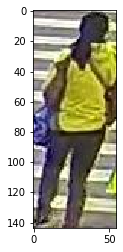

In [75]:
img = cv.imread(join(dataset, genders['females'][200]))[:,:,::-1]
print(img.shape)
plt.imshow(img)
plt.show()